# Case1: 군집분석(관광활동유형 포함)

In [1]:
import pandas as pd

df1 = pd.read_excel("우리지역관광_최종.xlsx")

case1 = df1[['시군구','방문자수 합계','관광지수','인구수','여행소비건수','관광활동유형']]

case1

,시군구,방문자수 합계,관광지수,인구수,여행소비건수,관광활동유형
0,강원도 강릉시,16360422,6,212890,1357946,2
1,강원도 고성군,5040013,4,26760,608207,2
2,강원도 동해시,4521770,3,89868,150823,2
3,강원도 삼척시,4428845,3,64355,651252,2
4,강원도 속초시,9903555,3,82302,1495617,2
...,...,...,...,...,...,...
224,충청북도 제천시,5061581,7,132643,158932,1
225,충청북도 증평군,2378613,1,36532,52244,3
226,충청북도 진천군,4825486,0,84437,78304,4
227,충청북도 청주시,54888188,0,845534,589150,3


In [2]:
address = []

for i in range(len(case1)):
    address.append(case1['시군구'][i])
    
address

['강원도 강릉시',
 '강원도 고성군',
 '강원도 동해시',
 '강원도 삼척시',
 '강원도 속초시',
 '강원도 양구군',
 '강원도 양양군',
 '강원도 영월군',
 '강원도 원주시',
 '강원도 인제군',
 '강원도 정선군',
 '강원도 철원군',
 '강원도 춘천시',
 '강원도 태백시',
 '강원도 평창군',
 '강원도 홍천군',
 '강원도 화천군',
 '강원도 횡성군',
 '경기도 가평군',
 '경기도 고양시',
 '경기도 과천시',
 '경기도 광명시',
 '경기도 광주시',
 '경기도 구리시',
 '경기도 군포시',
 '경기도 김포시',
 '경기도 남양주시',
 '경기도 동두천시',
 '경기도 부천시',
 '경기도 성남시',
 '경기도 수원시',
 '경기도 시흥시',
 '경기도 안산시',
 '경기도 안성시',
 '경기도 안양시',
 '경기도 양주시',
 '경기도 양평군',
 '경기도 여주시',
 '경기도 연천군',
 '경기도 오산시',
 '경기도 용인시',
 '경기도 의왕시',
 '경기도 의정부시',
 '경기도 이천시',
 '경기도 파주시',
 '경기도 평택시',
 '경기도 포천시',
 '경기도 하남시',
 '경기도 화성시',
 '경상남도 거제시',
 '경상남도 거창군',
 '경상남도 고성군',
 '경상남도 김해시',
 '경상남도 남해군',
 '경상남도 밀양시',
 '경상남도 사천시',
 '경상남도 산청군',
 '경상남도 양산시',
 '경상남도 의령군',
 '경상남도 진주시',
 '경상남도 창녕군',
 '경상남도 창원시',
 '경상남도 통영시',
 '경상남도 하동군',
 '경상남도 함안군',
 '경상남도 함양군',
 '경상남도 합천군',
 '경상북도 경산시',
 '경상북도 경주시',
 '경상북도 고령군',
 '경상북도 구미시',
 '경상북도 군위군',
 '경상북도 김천시',
 '경상북도 문경시',
 '경상북도 봉화군',
 '경상북도 상주시',
 '경상북도 성주군',
 '경상북도 안동시',
 '경상북도 영덕군',
 '경상북도 영양군',
 '경상북도

In [3]:
import json
import requests

result_addr1 = []
result_addr2 = []

def getLatLng(addr):
    
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + addr
    headers = {"Authorization": "KakaoAK 17d46dd05c8800359594f9944d8effcc"}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address']
    result_addr1.append(float(match_first['y']))
    result_addr2.append(float(match_first['x']))
    
    return 0


for i in range(len(address)):
    getLatLng(address[i])
    

In [4]:
case1['위도'] = result_addr1
case1['경도'] = result_addr2

case1['위도'].head()

<ipython-input-4-daa141bee6dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case1['위도'] = result_addr1
<ipython-input-4-daa141bee6dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case1['경도'] = result_addr2


0    37.752108
1    38.380592
2    37.524742
3    37.449898
4    38.206894
Name: 위도, dtype: float64

# 클러스터링

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

case1_kmean = case1[['방문자수 합계','관광지수','인구수','여행소비건수','관광활동유형']]
pro_data1 = case1_kmean.copy()

scaler = preprocessing.MinMaxScaler()
pro_data1[['방문자수 합계','관광지수','인구수','여행소비건수','관광활동유형']] = \
                        scaler.fit_transform(pro_data1[['방문자수 합계','관광지수','인구수','여행소비건수','관광활동유형']])


In [6]:
inertia_arr1=[]

for i in range(2,15):
    Kmeans1 = KMeans(n_clusters=i,random_state=200)
    Kmeans1.fit(pro_data1)
    interia1 = Kmeans1.inertia_
    
    print('i:',i,'inertia:',interia1)
    inertia_arr1.append(interia1)

i: 2 inertia: 22.16502223231548
i: 3 inertia: 16.371543483225516
i: 4 inertia: 12.943055204195012
i: 5 inertia: 10.491750308289316
i: 6 inertia: 9.072787008562045
i: 7 inertia: 7.837873891311762
i: 8 inertia: 6.620136232910904
i: 9 inertia: 5.645127947826576
i: 10 inertia: 4.993480830713109
i: 11 inertia: 4.351673348939301
i: 12 inertia: 3.9862350534656343
i: 13 inertia: 3.7573932172837265
i: 14 inertia: 3.442066350199073


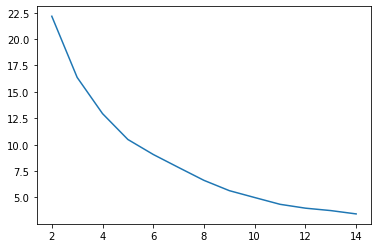

In [7]:
plt.plot(range(2,15),inertia_arr1)
plt.show()

In [8]:
model1 = KMeans(n_clusters=5)
model1.fit(pro_data1)

result1 = pro_data1.copy()
result1['cluster'] = model1.labels_
case1['cluster'] = result1['cluster']
case1

<ipython-input-8-c1fcdefb5826>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case1['cluster'] = result1['cluster']


,시군구,방문자수 합계,관광지수,인구수,여행소비건수,관광활동유형,위도,경도,cluster
0,강원도 강릉시,16360422,6,212890,1357946,2,37.752108,128.875906,2
1,강원도 고성군,5040013,4,26760,608207,2,38.380592,128.467866,2
2,강원도 동해시,4521770,3,89868,150823,2,37.524742,129.114299,2
3,강원도 삼척시,4428845,3,64355,651252,2,37.449898,129.165112,2
4,강원도 속초시,9903555,3,82302,1495617,2,38.206894,128.591939,2
...,...,...,...,...,...,...,...,...,...
224,충청북도 제천시,5061581,7,132643,158932,1,37.132658,128.190985,0
225,충청북도 증평군,2378613,1,36532,52244,3,36.785402,127.581540,1
226,충청북도 진천군,4825486,0,84437,78304,4,36.855386,127.435541,3
227,충청북도 청주시,54888188,0,845534,589150,3,36.642487,127.489020,4


In [9]:
import folium

case1_map = folium.Map(location = [37.56399541657583,126.98063382606773], zoom_start =6)

for i in range(len(case1)):
    title = case1.loc[i]['시군구']
    if(case1['cluster'][i]==0):
        marker0 = folium.Marker([case1.loc[i]['위도'],case1.loc[i]['경도']],
                                   icon=folium.Icon(color='blue'),tooltip=title)
        marker0.add_to(case1_map)
    elif(case1['cluster'][i]==1):
        marker1 = folium.Marker([case1.loc[i]['위도'],case1.loc[i]['경도']],
                                   icon=folium.Icon(color='orange'),tooltip=title)
        marker1.add_to(case1_map)
    elif(case1['cluster'][i]==2):
        marker2 = folium.Marker([case1.loc[i]['위도'],case1.loc[i]['경도']],
                                   icon=folium.Icon(color='green'),tooltip=title)
        marker2.add_to(case1_map)
    elif(case1['cluster'][i]==3):
        marker3 = folium.Marker([case1.loc[i]['위도'],case1.loc[i]['경도']],
                               icon=folium.Icon(color='red'),tooltip=title)
        marker3.add_to(case1_map)
    else:
        marker4 = folium.Marker([case1.loc[i]['위도'],case1.loc[i]['경도']],
                                   icon=folium.Icon(color='purple'),tooltip=title)
        marker4.add_to(case1_map)
        
case1_map.save('활동유형별_군집분석.html')
case1_map

In [10]:
clu0 = []
clu1 = []
clu2 = []
clu3 = []
clu4 = []

for i in range(len(case1)):
    if(case1['cluster'][i]==0):
        clu0.append(case1['시군구'][i])
    elif(case1['cluster'][i]==1):
        clu1.append(case1['시군구'][i])
    elif(case1['cluster'][i]==2):
        clu2.append(case1['시군구'][i])
    elif(case1['cluster'][i]==3):
        clu3.append(case1['시군구'][i])
    else:
        clu4.append(case1['시군구'][i])
        

case1[case1['cluster']==0].to_excel('관광활동유형_cluster0.xlsx')
case1[case1['cluster']==1].to_excel('관광활동유형_cluster1.xlsx')
case1[case1['cluster']==2].to_excel('관광활동유형_cluster2.xlsx')
case1[case1['cluster']==3].to_excel('관광활동유형_cluster3.xlsx')
case1[case1['cluster']==4].to_excel('관광활동유형_cluster4.xlsx')